In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on Synthetic Network</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
kind = "BAH"                    # network generative model type
N = 2000                        # number of nodes
m = 4                           # minimun degree (proxy of density)
H = 0.1                         # homophily
B = 0.5                         # class balance (minority fraction)
sampling = "nodes"              # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.9                    # fraction of nodes to sample 
epoch = 1                       # epoch (iteration number #)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
IGNORE = 0                      # IGNORE class value
DATAFN = "../data/USF51.gpickle"   # networkx graph file path
OUTPUT = "../results-individual"   # directory to store results

<h2>1. Network</h2>

In [4]:
net = Network()
net.load(DATAFN, IGNORE)
net.info()

Name: USF51
Type: Graph
Number of nodes: 1705
Number of edges: 15597
Average degree:  18.2956
{'group': ['M', 'm'], 'class': 'gender', 'attributes': ['status', 'gender', 'major', '2major', 'dorm', 'year', 'highschool'], 'labels': [1, 2], 'name': 'USF51', 'ignoreInt': 0, 'fullname': 'USF51', 'kind': None, 'N': 1705, 'm': 1, 'B': 0.40410557184750734, 'H': 0.3490430514902541, 'i': None, 'x': None, 'n': 1705, 'e': 15597, 'h': 0.5, 'b': 0.40410557184750734, 'min_degree': 1, 'k': 18.29560117302053, 'km': 17.596516690856312, 'kM': 18.769685039370078}


<h2>2. Sampling</h2>

In [5]:
sam = Sampling(sampling, net.G, pseeds, epoch)
sam.extract_subgraph()
sam.info()

Name: USF51
Type: Graph
Number of nodes: 1534
Number of edges: 12377
Average degree:  16.1369
{'group': ['M', 'm'], 'class': 'gender', 'attributes': ['status', 'gender', 'major', '2major', 'dorm', 'year', 'highschool'], 'labels': [1, 2], 'name': 'USF51', 'ignoreInt': 0, 'fullname': 'USF51', 'kind': None, 'N': 1534, 'm': 0, 'B': 0.4015645371577575, 'H': 0.35597948600026214, 'i': None, 'x': None, 'e': 12377, 'h': 0.5, 'k': 16.13689700130378, 'km': 15.571428571428571, 'kM': 16.516339869281047, 'pseeds': 0.9, 'method': 'nodes', 'epoch': 1}


<h2>3. Modeling</h2>

In [6]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

1    0.598307
2    0.401693
dtype: float64


In [7]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

          1         2
1  0.556911  0.443089
2  0.700334  0.299666


<h2>4. Inference</h2>

In [8]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(1, 1, 0, 0, 1)
(1, 0, 1, 0, 0)
(0.9846667199861168, 0.5745153785741618, 0.8210643647757293, 0.26268760129682245, 0.04651931239050516)

Prediction in 137.57482886314392 seconds
ROCAUC: 0.6622868325412357
ROCAUC curve: 0.6622868325412357
MAE: 0.4444444444444444
ccm: 0.4657534246575342
ccM: 0.6224489795918368
bias: 0.42800256904303147

USF51_nodes creating...
USF51_nodes created!
USF51_nodes/P90_graph.gpickle saved!
USF51_nodes/P90_samplegraph.gpickle saved!
USF51_nodes/P90_evaluation.pickle saved!


<h2>5. Results</h2>

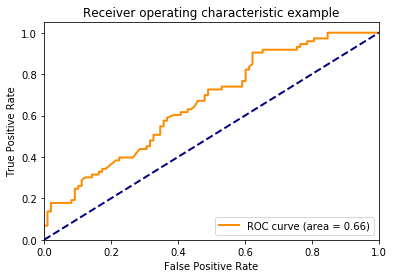

In [9]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)